# Loan Default Risk Analysis


The goal is to use Exploratory Data Analysis (EDA) techniques to identify patterns and driving factors that indicate if a loan applicant is likely to default. This analysis will help the consumer finance company make informed decisions about loan approvals and risk assessment.

## Type of risks to be focused on

1: If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2: If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

In [4]:
# An assessment of the loan default risk analysis code
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the loan dataset
dtypes = {
    'total_il_high_credit_limit': 'object'
}
loan_data = pd.read_csv('loan.csv', low_memory=False)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Understanding

Check the structure of the dataset and missing values.

In [6]:
loan_data.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# Data Understanding
# Check the structure of the dataset
print("Dataset shape:", loan_data.shape)
print("Dataset columns:", loan_data.columns)

Dataset shape: (39717, 111)
Dataset columns: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [8]:
# Check for missing values
print("Missing values:")
pd.set_option('display.max_rows', None)
print(loan_data.isnull().sum())

Missing values:
id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                     

## Data Cleaning

In [9]:
# Handle missing values
# Drop columns with high missing percentages
# Missing values were handled by filling categorical variables with 'Missing', 
# numerical variables with the median value, and count variables with 0.

columns_to_drop = ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 
                   'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
                   'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
                   'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 
                   'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
                   'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 
                   'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 
                   'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
                   'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 
                   'total_il_high_credit_limit', 'next_pymnt_d']
loan_data = loan_data.drop(columns=columns_to_drop)

In [10]:
# Fill missing values with appropriate methods
loan_data['emp_title'] = loan_data['emp_title'].fillna('Missing')
loan_data['emp_length'] = loan_data['emp_length'].fillna('Missing')
loan_data['desc'] = loan_data['desc'].fillna('Missing')
loan_data['title'] = loan_data['title'].fillna('Missing')
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype(float)
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].median())
loan_data['collections_12_mths_ex_med'] = loan_data['collections_12_mths_ex_med'].fillna(0)
loan_data['mths_since_last_delinq'] = loan_data['mths_since_last_delinq'].fillna(loan_data['mths_since_last_delinq'].median())
loan_data['mths_since_last_record'] = loan_data['mths_since_last_record'].fillna(loan_data['mths_since_last_record'].median())
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(0)
loan_data['tax_liens'] = loan_data['tax_liens'].fillna(0)

## Univariate Analysis

In [11]:
# Analyze the distribution of the target variable (loan_status)
print("Loan Status Distribution:")
print(loan_data['loan_status'].value_counts(normalize=True))

Loan Status Distribution:
loan_status
Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: proportion, dtype: float64


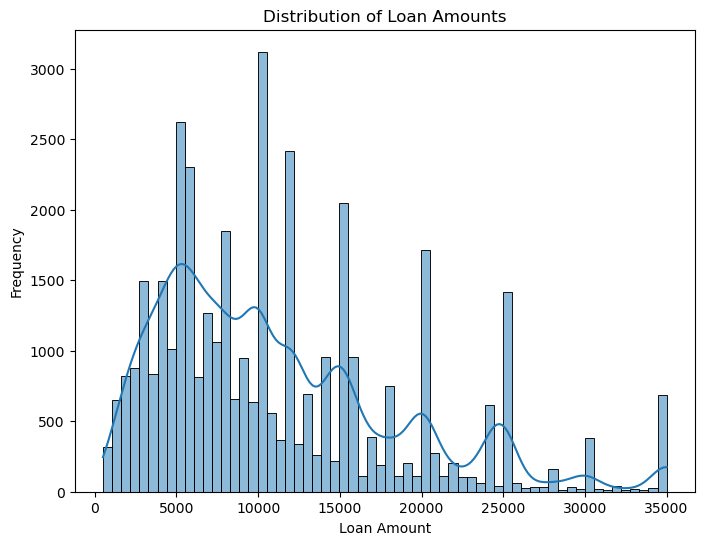

In [12]:
# Visualize the distribution of loan amounts
plt.figure(figsize=(8, 6))
sns.histplot(loan_data['loan_amnt'], kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

## Bivariate Analysis

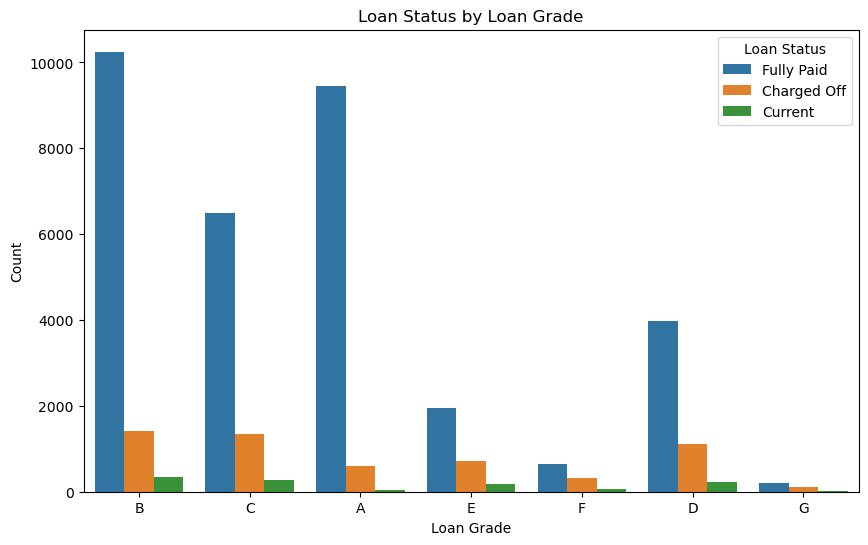

In [60]:
# Analyze the relationship between loan grade and loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=loan_data)
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Loan Status by Loan Grade')
plt.legend(title='Loan Status')
plt.show()

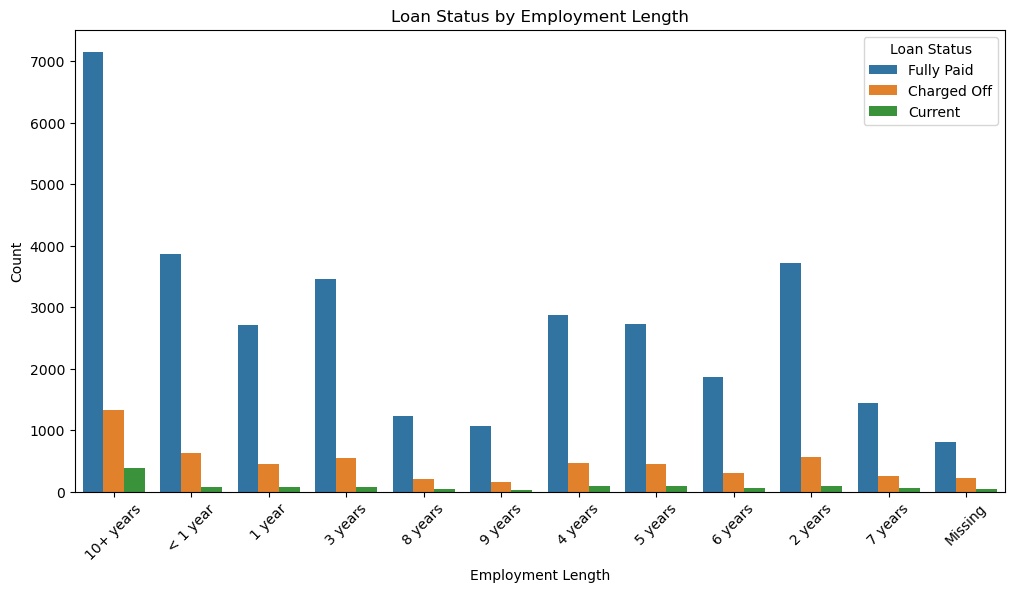

In [61]:
# Analyze the relationship between employment length and loan status
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan_data)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Loan Status by Employment Length')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

## Multivariate Analysis

/Users/jagruti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


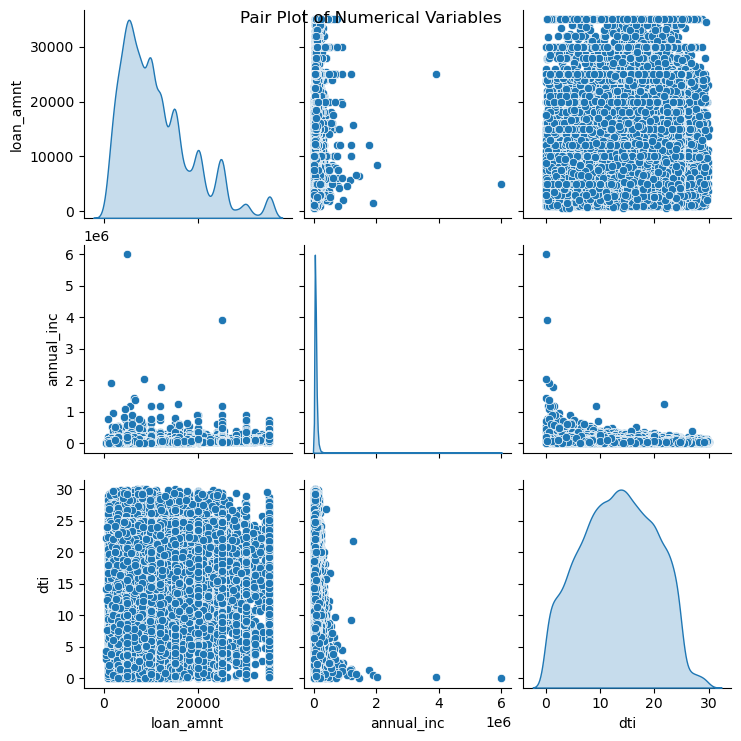

In [68]:

# Create a pair plot to visualize relationships between numerical variables
sns.pairplot(loan_data[['loan_amnt', 'int_rate', 'annual_inc', 'dti']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()

## Insights and Observations

In [76]:
# Loans with higher interest rates tend to have a higher proportion of defaults
high_int_rate = loan_data[loan_data['int_rate'] > 15]
print("Default Rate for High Interest Loans:", high_int_rate['loan_status'].value_counts(normalize=True)['Charged Off'])

Default Rate for High Interest Loans: 0.24501758499413834


In [77]:
# Borrowers with longer employment lengths have a lower default rate
long_emp = loan_data[loan_data['emp_length'] == '10+ years']
print("Default Rate for Borrowers with 10+ Years Employment:", long_emp['loan_status'].value_counts(normalize=True)['Charged Off'])

Default Rate for Borrowers with 10+ Years Employment: 0.1499042684987048
